In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt 
import numpy as np 
from tensorflow.keras import layers, models

2024-01-04 21:25:41.780462: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-04 21:25:41.814890: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-04 21:25:41.972330: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-04 21:25:41.972367: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-04 21:25:42.003201: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

### Loading MNIST Data :

In [5]:
(train_images, train_labels) , (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [6]:
assert train_images.shape == (60000, 28, 28)
assert test_images.shape == (10000, 28, 28)
assert train_labels.shape == (60000,)
assert test_labels.shape == (10000,)

## EDA on Data : 

In [7]:
print("Training set images shape:", train_images.shape)  
print("Training set labels shape:", train_labels.shape)
print("Test set images shape:", test_images.shape) 
print("Test set labels shape:", test_labels.shape)


Training set images shape: (60000, 28, 28)
Training set labels shape: (60000,)
Test set images shape: (10000, 28, 28)
Test set labels shape: (10000,)


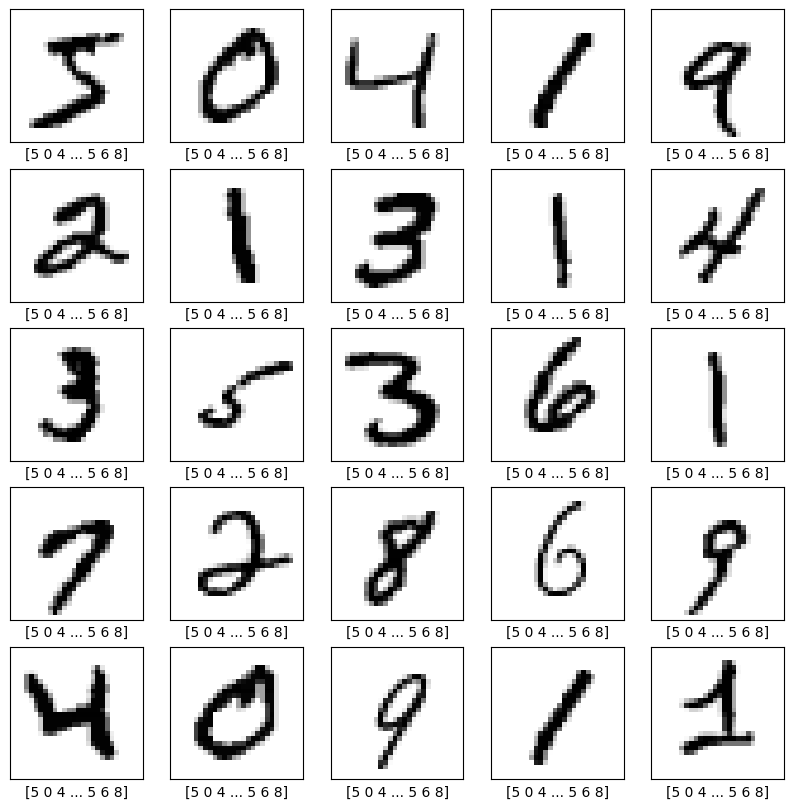

In [8]:
plt.figure(figsize=(10,10))
for i in range(25): 
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels)
plt.show()

### Checking the distribution of Labels : 

In [9]:
unique, counts = np.unique(train_labels,return_counts=True)
print("Train labels distribution:", dict(zip(unique, counts)))

unique, counts = np.unique(test_labels, return_counts=True)
print("Test labels distribution: ", dict(zip(unique,counts)))

Train labels distribution: {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Test labels distribution:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


####  reshaping the data to include a channel dimension

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape for CNN input
train_images = train_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1, 28, 28, 1))

## Task 1 : 

### Selecting a Random Sample : 

In [11]:
random_index = np.random.randint(0,len(train_images))
sample_image, sample_label = train_images[random_index], train_labels[random_index]

In [12]:
sample_label

6

### Plotting the Sample : 

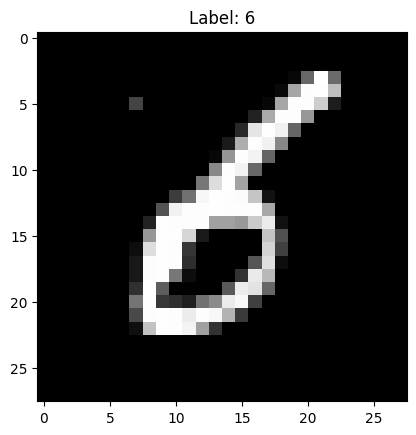

In [13]:
plt.imshow(sample_image,cmap='gray')
plt.title(f'Label: {sample_label}')
plt.show()

### Examples of activation functions : 

Five commonly used activation functions in neural networks:

<b>ReLU (Rectified Linear Unit)</b><br>
<b>Formula:</b> f(x) = max(0, x)<br>
<b>Description:</b> ReLU is widely used due to its simplicity and efficiency. It outputs the input directly if it's positive, otherwise, it outputs zero.<br><br>

<b>Sigmoid</b><br>
<b>Formula:</b> f(x) = 1 / (1 + e^(-x))<br>
<b>Description:</b> The sigmoid function outputs values between 0 and 1, making it suitable for binary classification problems.<br><br>

<b>Tanh (Hyperbolic Tangent)</b><br>
<b>Formula:</b> f(x) = (e^x - e^(-x)) / (e^x + e^(-x))<br>
<b>Description:</b> Similar to sigmoid but outputs values between -1 and 1. Useful when the model needs to make decisions between two extremes.<br><br>

<b>Softmax</b><br>
<b>Formula:</b> In a vector of real numbers x, the Softmax of the ith element is e^(x_i) / sum(e^(x_j))<br>
<b>Description:</b> Often used in the output layer of a neural network for multi-class classification, returning probabilities of each class.<br><br>

<b>Leaky ReLU</b><br>
<b>Formula:</b> f(x) = x if x > 0; f(x) = αx otherwise, where α is a small constant.<br>
<b>Description:</b> A variation of ReLU that allows a small gradient when the unit is not active, helping to mitigate the dying ReLU problem.

## Task 2 : 

In [14]:
model = models.Sequential()

#### Adding Convoluional Layres : 

In [15]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


#### Flattening the output and adding Dense Layers: 

In [16]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


#### Compiling the Model : 

In [17]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [18]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

## Task 3 : 

#### Optimizer Adam : 

In [19]:
optimizer = 'adam'

In [20]:
loss = 'sparse_categorical_crossentropy'

In [21]:
metrics = ['accuracy']


In [22]:
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)


##### Second part

In [23]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [25]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1429 - accuracy: 0.9552 - val_loss: 0.0412 - val_accuracy: 0.9859
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0461 - accuracy: 0.9855 - val_loss: 0.0341 - val_accuracy: 0.9890
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0319 - accuracy: 0.9898 - val_loss: 0.0339 - val_accuracy: 0.9891
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0255 - accuracy: 0.9918 - val_loss: 0.0359 - val_accuracy: 0.9878
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0194 - accuracy: 0.9936 - val_loss: 0.0313 - val_accuracy: 0.9896
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0157 - accuracy: 0.9953 - val_loss: 0.0316 - val_accuracy: 0.9907
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0141 - accuracy: 0.9954 - val_loss: 0.0302 - val_accuracy:

## Task 4 : 

#### Evaluating performance of our CNN model : 
#### Plotting the training loss over Epochs : 

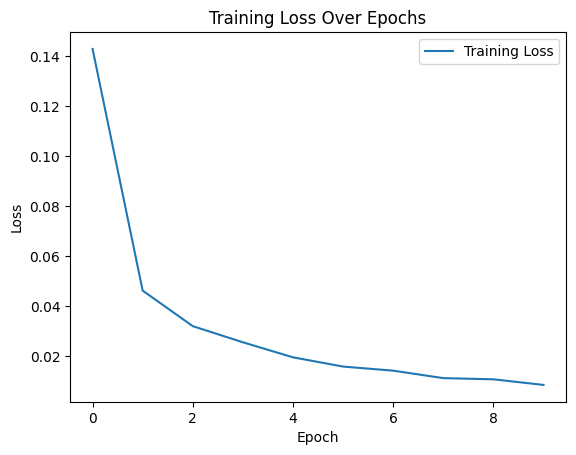

In [26]:
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

#### Evaluating Test accuracy : 

In [27]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test Accuracy: ", test_accuracy)

313/313 [==============================] - 0s 1ms/step - loss: 0.0365 - accuracy: 0.9908
Test Accuracy:  0.9908000230789185
